# Feature Scaling (1-Standardization)

#### Scaling of large and small data (nature of the data remanin same)

# Xnew = (Xi - Xmean)/Stand Deviation


# the mean of this new data is always is 0 and the variance is always 1
## mean=0
## variance= -1 to 1
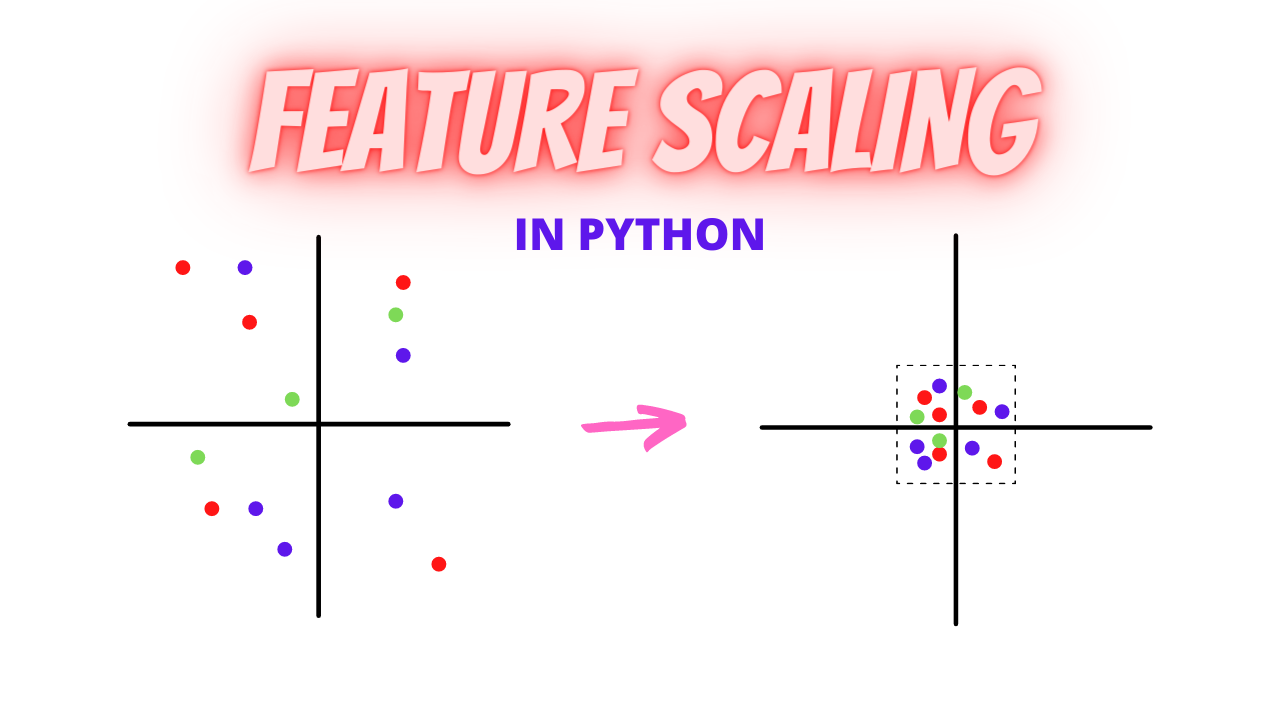

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("Online Sales Data.csv")
df.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001.0,01-01-2024,NaN,iPhone 14 Pro,2.0,999.99,1999.98,North America,Credit Card
1,10002.0,02-01-2024,Home Appliances,Dyson V11 Vacuum,1.0,499.99,499.99,Europe,PayPal
2,10003.0,03-01-2024,Clothing,Levi's 501 Jeans,3.0,69.99,209.97,Asia,Debit Card
3,10004.0,04-01-2024,Books,The Da Vinci Code,4.0,15.99,63.96,North America,Credit Card
4,10005.0,05-01-2024,Beauty Products,Neutrogena Skincare Set,1.0,89.99,89.99,Europe,PayPal
5,10006.0,06-01-2024,Sports,Wilson Evolution Basketball,5.0,29.99,149.95,Asia,Credit Card
6,10007.0,07-01-2024,Electronics,MacBook Pro 16-inch,1.0,2499.99,2499.99,North America,Credit Card
7,10008.0,08-01-2024,Home Appliances,Blueair Classic 480i,2.0,599.99,1199.98,Europe,PayPal
8,10009.0,09-01-2024,Clothing,Nike Air Force 1,6.0,89.99,539.94,Asia,Debit Card
9,10010.0,10-01-2024,Books,Dune by Frank Herbert,2.0,25.99,51.98,North America,Credit Card


In [5]:
df.isnull().sum()

Transaction ID      1
Date                0
Product Category    4
Product Name        1
Units Sold          2
Unit Price          2
Total Revenue       1
Region              2
Payment Method      1
dtype: int64

In [10]:
df["Total Revenue"].fillna(df["Total Revenue"].mean(),inplace=True)
df.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_3344\870894116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Revenue"].fillna(df["Total Revenue"].mean(),inplace=True)


Transaction ID      1
Date                0
Product Category    4
Product Name        1
Units Sold          2
Unit Price          2
Total Revenue       0
Region              2
Payment Method      1
dtype: int64

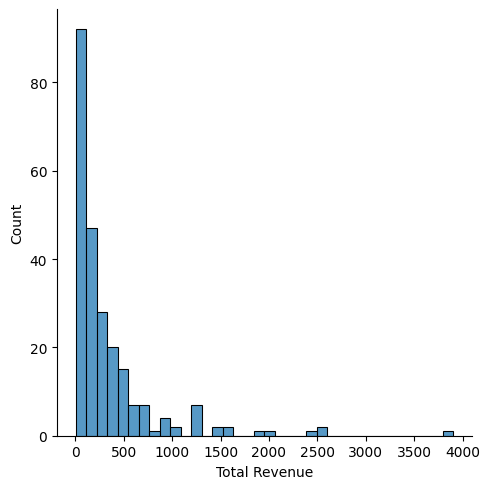

In [12]:
# now we see  the outlier 
sns.displot(df["Total Revenue"])
plt.show()

In [13]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,239.000000,238.000000,238.000000,240.000000
mean,10120.523013,2.163866,238.132143,336.309038
std,69.571003,1.325837,430.833360,485.712648
min,10001.000000,1.000000,6.500000,6.500000
25%,10060.500000,1.000000,29.622500,62.965000
50%,10121.000000,2.000000,89.995000,179.970000
75%,10180.500000,3.000000,249.990000,399.225000
max,10240.000000,10.000000,3899.990000,3899.990000


In [15]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(df[["Total Revenue"]])

StandardScaler()

In [21]:
df["ss_total_revinew"]=pd.DataFrame(ss.transform(df[["Total Revenue"]]),columns=["x"])

In [23]:
df.head(5)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,ss_total_revinew
0,10001.0,01-01-2024,NaN,iPhone 14 Pro,2.0,999.99,1999.98,North America,Credit Card,3.432375
1,10002.0,02-01-2024,Home Appliances,Dyson V11 Vacuum,1.0,499.99,499.99,Europe,PayPal,0.337696
2,10003.0,03-01-2024,Clothing,Levi's 501 Jeans,3.0,69.99,209.97,Asia,Debit Card,-0.260654
3,10004.0,04-01-2024,Books,The Da Vinci Code,4.0,15.99,63.96,North America,Credit Card,-0.561892
4,10005.0,05-01-2024,Beauty Products,Neutrogena Skincare Set,1.0,89.99,89.99,Europe,PayPal,-0.508189


In [24]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue,ss_total_revinew
count,239.000000,238.000000,238.000000,240.000000,2.400000e+02
mean,10120.523013,2.163866,238.132143,336.309038,1.924387e-16
std,69.571003,1.325837,430.833360,485.712648,1.002090e+00
min,10001.000000,1.000000,6.500000,6.500000,-6.804400e-01
25%,10060.500000,1.000000,29.622500,62.965000,-5.639451e-01
50%,10121.000000,2.000000,89.995000,179.970000,-3.225483e-01
75%,10180.500000,3.000000,249.990000,399.225000,1.298040e-01
max,10240.000000,10.000000,3899.990000,3899.990000,7.352348e+00


# Before

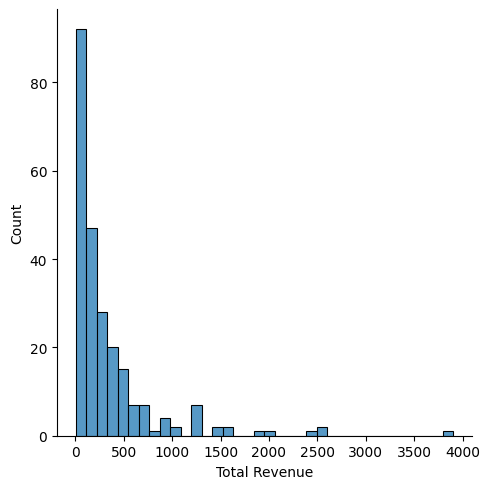

In [42]:

sns.displot(df["Total Revenue"])

plt.show()

# After



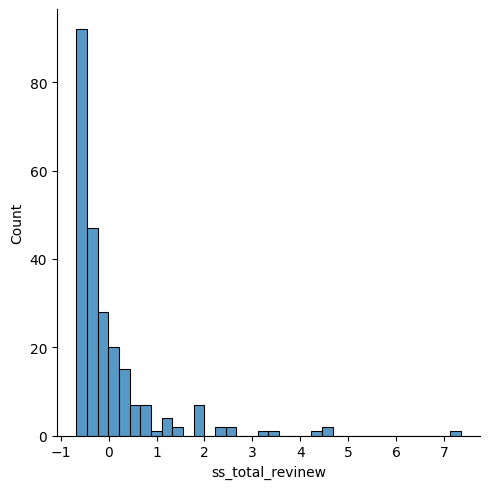

In [44]:

sns.displot(df["ss_total_revinew"])

plt.show()

# Feature Scaling (2-Normalization) -just magnitube chnages 
# min-max scaling

## Xnew = Xi - min(X)/max()-min(X)
Ex = 1,2,3,4,5,6,7,8,9,10 here minimun is 1 and 10 
The range is in between 0-1

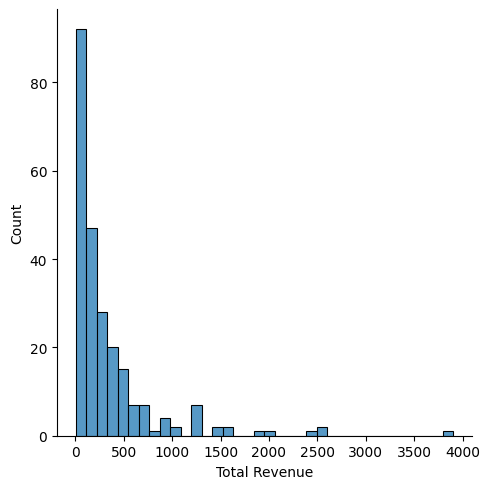

In [34]:
sns.displot(df["Total Revenue"])
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(df[["Total Revenue"]])

MinMaxScaler()

In [39]:
df["ms_total_review"]=ms.transform(df[["Total Revenue"]])
df.head(5)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,ss_total_revinew,ms_total_review
0,10001.0,01-01-2024,NaN,iPhone 14 Pro,2.0,999.99,1999.98,North America,Credit Card,3.432375,0.512003
1,10002.0,02-01-2024,Home Appliances,Dyson V11 Vacuum,1.0,499.99,499.99,Europe,PayPal,0.337696,0.126747
2,10003.0,03-01-2024,Clothing,Levi's 501 Jeans,3.0,69.99,209.97,Asia,Debit Card,-0.260654,0.052259
3,10004.0,04-01-2024,Books,The Da Vinci Code,4.0,15.99,63.96,North America,Credit Card,-0.561892,0.014758
4,10005.0,05-01-2024,Beauty Products,Neutrogena Skincare Set,1.0,89.99,89.99,Europe,PayPal,-0.508189,0.021443


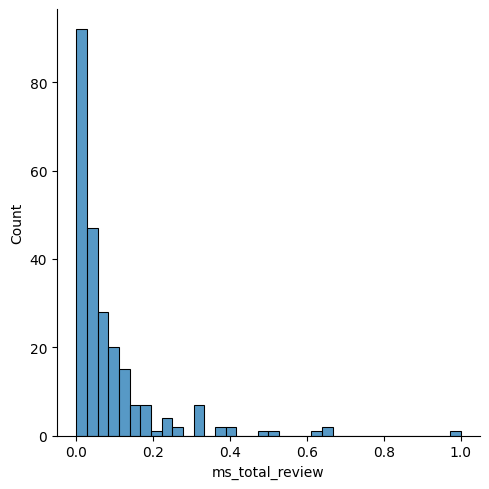

In [45]:
sns.displot(df["ms_total_review"])
plt.show()